### **CC57 - MACHINE LEARNING - EVALUACION DEL MODELO DE REGRESION LINEAL**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
data = pd.read_csv('ventas.csv',sep=";")

In [3]:
data.head(5)

,Ventas,Radio,TV,Diarios
0,551,80,35,70
1,547,58,35,88
2,382,63,21,58
3,453,73,36,64
4,387,64,16,69


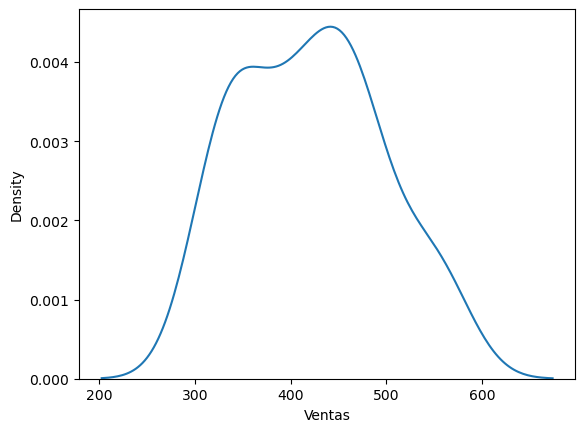

In [4]:
#kdeplot() es un método para visualizar la distribución de observaciones en un conjunto de datos,
#análogo a un histograma

#distribución del atributo ventas
sns.kdeplot(data.Ventas)
plt.show()

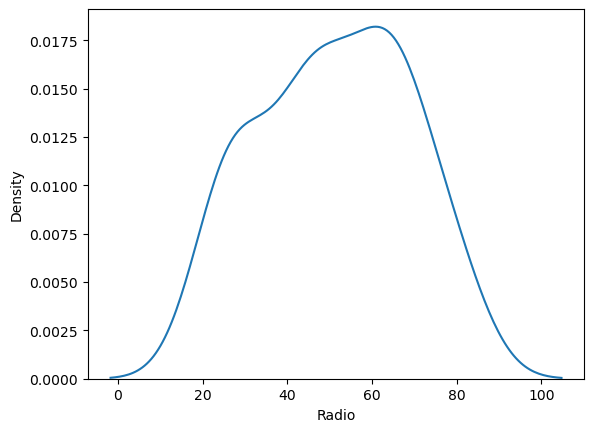

In [5]:
#distribución del atributo Radio

sns.kdeplot(data.Radio)
plt.show()

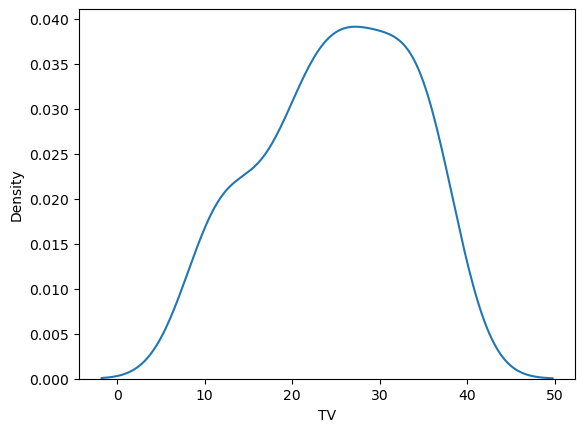

In [6]:
#distribución del atributo TV

sns.kdeplot(data.TV)
plt.show()

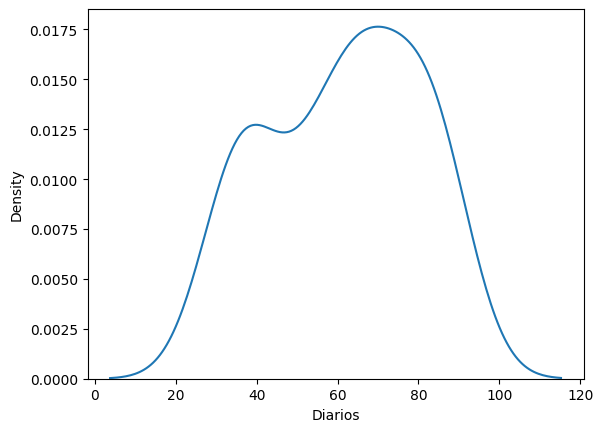

In [9]:
#distribución del atributo Diarios

sns.kdeplot(data.Diarios)
plt.show()

#### Pruebas de normalidad

In [10]:
#Prueba de normalidad (Shapiro)
#Ho: La variable se aproxima a una distribución normal
#Ha: La variable NO se aproxima a una distribución normal

#Si p-value < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, la variable NO se aproxima a una distribución normal.

#Si p-value > 5%, no se rechaza la hipótesis nula (Ho),
#al 95% de confianza, la variable se aproxima a una distribución normal.

In [11]:
#Prueba de normalidad
ss.shapiro(data['Ventas'])

ShapiroResult(statistic=0.9536956548690796, pvalue=0.08139301836490631)

In [12]:
#Prueba de normalidad
ss.shapiro(data['Radio'])

ShapiroResult(statistic=0.9463552236557007, pvalue=0.043931834399700165)

In [13]:
#Prueba de normalidad
ss.shapiro(data['TV'])

ShapiroResult(statistic=0.9397192001342773, pvalue=0.025393052026629448)

In [14]:
#Prueba de normalidad
ss.shapiro(data['Diarios'])

ShapiroResult(statistic=0.9332764744758606, pvalue=0.015082872472703457)

####**Interpretacion de la prueba de normalidad**

In [15]:
#Como el p-value es mayor a 5% para la variable Ventas, no se rechaza la hipótesis nula (Ho),
#al 95% de confianza, la variable se aproxima a una distribución normal.

#Como el p-value es menor a 5% para las variables Radio, TV y Diarios, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, las variables NO se aproxima a una distribución normal.

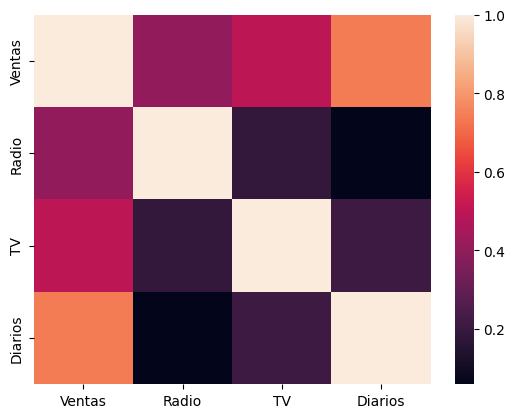

In [16]:
#Matriz de correlacion de las variables
#Heatmap
sns.heatmap(data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman"))
plt.show()

In [17]:
data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman")

,Ventas,Radio,TV,Diarios
Ventas,1.000000,0.404255,0.499225,0.741982
Radio,0.404255,1.000000,0.186254,0.059299
TV,0.499225,0.186254,1.000000,0.208621
Diarios,0.741982,0.059299,0.208621,1.000000


In [18]:
#Supuesto 1

#linealidad => Ventas vs Radio | Ventas vs TV | Ventas vs Diarios => p-value < 5%

#Conclusión
#Como p-value < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, existe correlación entre las variables:
#Ventas vs Radio | Ventas vs TV | Ventas vs Diarios.

#Al 95% de confianza, se cumple la linealidad entre la variables dependiente (target) vs las variables
#independientes (drivers).

In [19]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

#Si p-value < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, existe correlación entre las variables.

#Si p-value > 5%, no se rechaza la hipótesis nula (Ho),
#al 95% de confianza, no existe correlación entre las variables.

In [20]:
ss.spearmanr(data['Ventas'],data['Radio'])

SignificanceResult(statistic=0.4042545567808915, pvalue=0.007175504487928522)

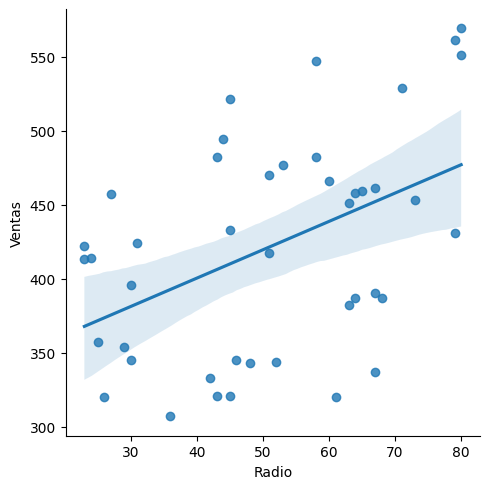

In [21]:
sns.lmplot(y='Ventas',x='Radio',data=data)
plt.show()

In [22]:
ss.spearmanr(data['Ventas'],data['TV'])

SignificanceResult(statistic=0.49922517771463226, pvalue=0.0006546986013042753)

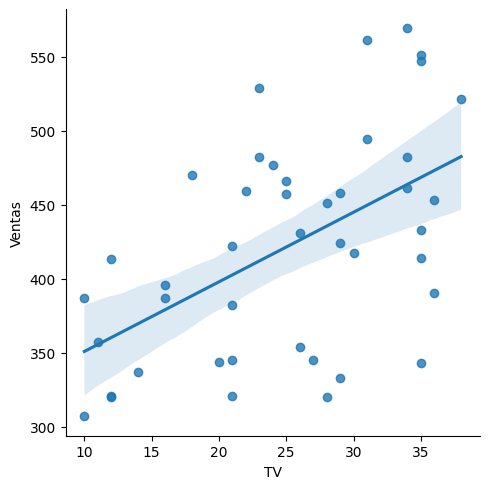

In [23]:
sns.lmplot(y='Ventas',x='TV',data=data)
plt.show()

In [24]:
ss.spearmanr(data['Ventas'],data['Diarios'])

SignificanceResult(statistic=0.7419818173372642, pvalue=1.244025397405954e-08)

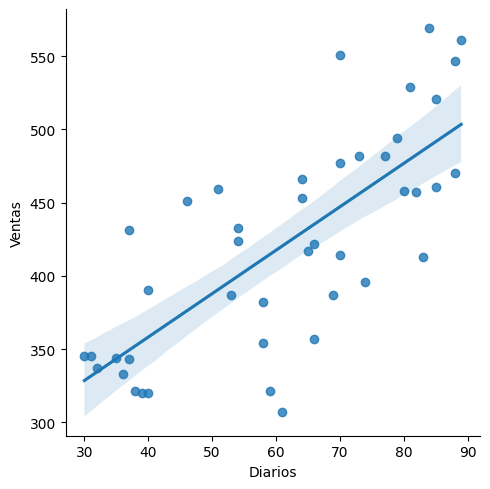

In [25]:
sns.lmplot(y='Ventas',x='Diarios',data=data)
plt.show()

In [26]:
#Supuesto 5

#No presencia de Multicolinealidad => TV vs Radio | Diarios vs Radio | Diarios vs TV => p-value > 5%

#Conclusión
#Como p-value > 5%, NO se rechaza la hipótesis nula (Ho),
#al 95% de confianza, NO existe correlación entre las variables independientes (drivers):
#TV vs Radio | Diarios vs Radio | Diarios vs TV .

#Al 95% de confianza, no existe presencia de multicolinealidad entre las variables independientes.

In [27]:
ss.spearmanr(data['Radio'],data['TV'])

SignificanceResult(statistic=0.1862535043498252, pvalue=0.23175322515474867)

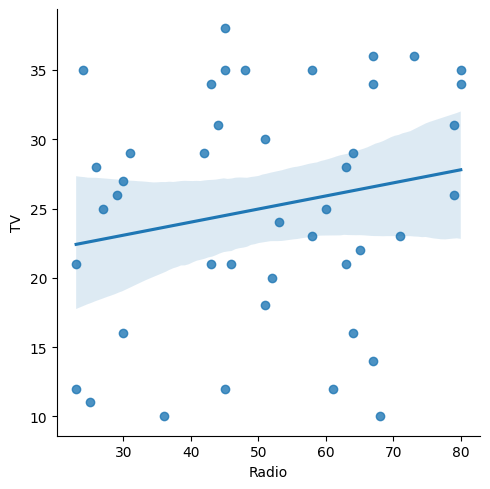

In [28]:
sns.lmplot(x='Radio',y='TV',data=data)
plt.show()

In [29]:
ss.spearmanr(data['Radio'],data['Diarios'])

SignificanceResult(statistic=0.0592992943049514, pvalue=0.7056342575130212)

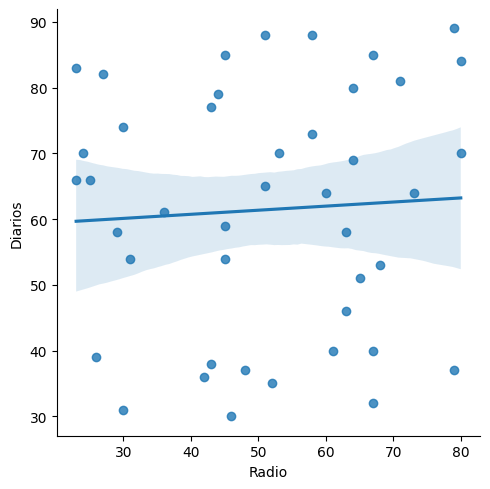

In [30]:
sns.lmplot(x='Radio',y='Diarios',data=data)
plt.show()

In [31]:
ss.spearmanr(data['TV'],data['Diarios'])

SignificanceResult(statistic=0.20862051388195071, pvalue=0.17942380987207668)

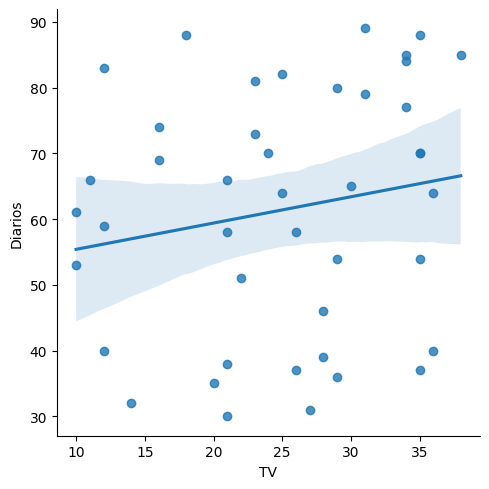

In [32]:
sns.lmplot(x='TV',y='Diarios',data=data)
plt.show()

### **Entrenamiento del modelo de Regresion Lineal**

La **regresión lineal de los mínimos cuadrado**, en ingles **OLS: Ordinary Least Squares regression**, es un **método común para estimar los coeficientes de las ecuaciones de regresión lineal** que describen la relación entre una (o varias) variables independientes cuantitativas y una variable dependiente.

La **función ols** (Ordinary Least Squares) de la biblioteca statsmodels en Python se utiliza para **realizar regresiones lineales utilizando el método de mínimos cuadrados ordinarios**. La expresión 'Ventas ~ Radio + TV + Diarios' en el modelo especifica que **la variable dependiente es Ventas** y **las variables independientes son Radio, TV y Diarios**.

In [34]:
#Regresión LinealEntrenamiento del modelo

modelo = smf.ols('Ventas ~ Radio + TV + Diarios', data = data).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     63.06
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           5.09e-15
Time:                        03:27:19   Log-Likelihood:                -207.61
No. Observations:                  43   AIC:                             423.2
Df Residuals:                      39   BIC:                             430.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.5435     23.643      4.591      0.0

In [35]:
#1.Coeficiente de determinación
# R-squared: 0.829 => El modelo más adecuado será el que tenga un R-squared cercano 1.
# El modelo es capaz de explicar al 82.9% de la variabilidad observada en las ventas.

# Adj. R-squared: 0.816 => El modelo más adecuado será el que tenga un R-squared cercano 1
# El modelo es capaz de explicar al 81.6% de la variabilidad observada en las ventas.

#2.Prueba ANOVA
#Ho: b0=b1=b2=b3=0
#Ha: al menos un bi != 0

#Prob (F-statistic) = 5.09e-15
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho)
#al 95% de confianza, el modelo es significativo.

#3.Prueba t para coeficientes
#Ho: bi=0
#Ha: bi!=0

##P-value = 0.000 para todos los coeficientes del modelo,
#=> Como el pvalor < 5%, se rechazan las hipótesis nulas (Ho),
#al 95% de confianza, los coeficientes del modelo son significativos.

#4.Supuestos del modelo

#a.Linealidad
#=> Ventas vs Radio, Ventas vs TV, Ventas vs Diarios => Supuesto 1 demostrado => ok

#b.Independencia de errores
#=> DW = 1.716, como este valor se encuentra entre 1.5 y 2.5 se cumple el supuesto => ok

In [36]:
#c.Homocedasticidad
#Ho: Las varianzas de los errores son constantes
#Ha: Las varianzas de los errores no son constantes

In [37]:
nombres = ['estadística del multiplicador de Lagrange', 'valor p','valor f', 'valor p f']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
[nombres[1],test[1]]

['valor p', 0.5219320806182572]

In [38]:
#=> Pvalor = 0.5219320806182659
#=> Como el pvalor > 5%, no se rechaza la hipótesis nula (Ho),
#al 95% de confianza, Las varianzas de los errores son constantes => ok

In [39]:
#d.Normalidad de errores
#Ho: Los errores se aproximan a un distribución normal
#Ha: Los errores no se aproximan a un distribución normal

#=> Prob(JB) = 0.362
#=> Como el pvalor > 5%, no se rechaza la hipótesis nula (Ho),
#al 95% de confianza, los errores se aproximan a un distribución normal => ok

#e.Multicolinealidad
#=> Radio vs TV, Radio vs Diarios, TV vs Diarios => Supuesto 5 demostrado => ok

In [40]:
#Coeficientes del modelo
modelo.params

Intercept    108.543492
Radio          1.464563
TV             3.035945
Diarios        2.639268
dtype: float64

Radio: Por cada 1000 soles invertidos en publicidad en la radio, las ventas aumentan en promedio 1464.56 soles.
TV: Por cada 1000 soles invertidos en TV, las ventas aumentan en promedio 3035.95 soles.
Diarios: Por cada 1000 soles invertidos en diarios, las ventas aumentan en promedio 2639.27 soles.

In [41]:
#Interpretación de coeficientes
#Ventas = 108.543492 + 1.464563Radio + 3.035945TV + 2.639268Diarios

#Radio => 1.464563, por cada 1000 soles que se invierte en publicidad por la Radio,
#las ventas aumentan en promedio en 1464.563 soles.

#TV => 3.035945, por cada 1000 soles que se invierte en publicidad por la TV,
#las ventas aumentan en promedio en 3035.945 soles.

#Diarios => 2.639268, por cada 1000 soles que se invierte en publicidad por los Diarios,
#las ventas aumentan en promedio en 2639.268 soles.

In [42]:
#Error del modelo
#A menor valor, el modelo es más adecuado
modelo.mse_resid

1008.1736046816455

In [43]:
#Intervalos de confianza para los coeficientes
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Intercept,60.721226,156.365758
Radio,0.886601,2.042526
TV,1.803980,4.267909
Diarios,2.095913,3.182623


In [44]:
#Validación del modelo

In [45]:
data_test = pd.read_csv('ventas_test.csv',sep=";")

In [46]:
data_test.head(5)

,Ventas,Radio,TV,Diarios
0,343,48,35,37
1,424,31,29,54
2,387,64,16,69
3,307,36,10,61
4,387,68,10,53


In [47]:
#exog es una abreviatura de "exógenas", y en la función predict se refiere a las nuevas observaciones de las variables independientes que se
#utilizarán para hacer predicciones con el modelo de regresión ajustado.

data_test_Ventas_pred = modelo.predict(exog = data_test)
data_test_Ventas_pred

0     382.753509
1     384.507820
2     432.960151
3     352.622566
4     378.374450
5     417.643363
6     470.138809
7     405.133559
8     441.229059
9     339.883911
10    477.965467
dtype: float64

In [48]:
data_test_f = pd.concat([pd.DataFrame(data_test),pd.DataFrame(data_test_Ventas_pred)],axis=1)
data_test_f.columns = ['Ventas','Radio','TV','Diarios','Ventas_Pred']

In [49]:
data_test_f.head()

,Ventas,Radio,TV,Diarios,Ventas_Pred
0,343,48,35,37,382.753509
1,424,31,29,54,384.507820
2,387,64,16,69,432.960151
3,307,36,10,61,352.622566
4,387,68,10,53,378.374450


In [50]:
#Metricas para el calculo de error del modelo

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [51]:
#MSE
mse = mean_squared_error(y_true = data_test_f.Ventas, y_pred = data_test_f.Ventas_Pred)
print(mse)

1145.94881039982


In [52]:
#RMSE
mse = mean_squared_error(y_true = data_test_f.Ventas, y_pred = data_test_f.Ventas_Pred)
print(np.sqrt(mse))

33.85186568565786


In [53]:
#MAE
mae = mean_absolute_error(y_true = data_test_f.Ventas, y_pred = data_test_f.Ventas_Pred)
print(mae)

28.89017768915681


In [54]:
#MAPE
mae = 100*mean_absolute_percentage_error(y_true = data_test_f.Ventas, y_pred = data_test_f.Ventas_Pred)
print(mae)

7.5756382648612846


In [55]:
#R2
r2 = r2_score(y_true = data_test_f.Ventas, y_pred = data_test_f.Ventas_Pred)
print(r2)

0.676208542776731


In [56]:
#R2 ajustado
n = len(data_test) # Cantidad de Filas del test
k = data_test.shape[1] - 1 #Cantidad de Columnas (variables independientes)
r2_adj = 1-((1-r2)*(n-1)/(n-k-1))
print(r2_adj)

0.5374407753953301


In [57]:
#Predicciones
Radio = [63,73,64]
TV = [21,36,16]
Diarios = [58,64,69]

data_new = pd.DataFrame({'Radio': Radio, 'TV': TV, 'Diarios':Diarios})
data_new

,Radio,TV,Diarios
0,63,21,58
1,73,36,64
2,64,16,69


In [58]:
Ventas_pred = modelo.predict(exog = data_new)
Ventas_pred

0    417.643363
1    493.663774
2    432.960151
dtype: float64

In [59]:
#Tarea
#1. Revisar https://www.statsmodels.org/stable/regression.html
#2. Revisar el link: https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
#3. Hacer uso de una muestra de train y test
#4. Hacer una gráfica entre los residuales y los valores pronosticados,
#compararlo con el test de Breusch-Pagan

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [9]:
X = data[['Radio', 'TV', 'Diarios']]  # Variables independientes
y = data['Ventas']

In [10]:
# X son las variables independientes (Radio, TV, Diarios)
# y es la variable dependiente (Ventas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Inicializa el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrena el modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred_rf = rf_model.predict(X_test)


In [13]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"R²: {r2_rf}")


MSE: 1901.4504777777777
MAE: 37.97888888888889
R²: -0.5723771714717414


In [14]:
# Define los parámetros que deseas probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Inicializa el modelo
rf = RandomForestRegressor(random_state=42)

# Usa GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
print("Mejores parámetros encontrados: ", grid_search.best_params_)

Mejores parámetros encontrados:  {'max_depth': None, 'n_estimators': 200}
